## Descriptive Statistics

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:/Users/Admin/Downloads/data.csv')
print(data.head())

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


### Mean

<p> Mean is one of the measures of Central Tendency of data. It is simply the sum of all data points divided by the count of all the data points. The calculation of mean incorporates ALL the values in the data and the calculated mean may or maynot be present in the data.
<p> Change in any value in the dataset will change the mean and hence mean is sensitive to the extreme values that influence the data set. 
<p> It is a good representative of the data when the data does not have extreme values.
    
$$mean = \frac{1}{n} \sum_{i=0}^{n}a_i$$
<p>    
    <center> n = total number of elements in set</center>
    <center> a = element at position i</center>

<p> Mean for a data set can be found in following ways:
<ol>
<li>Without Library: Make a function and pass each column in that to calculate the mean.</li>
<li>Pandas library</li>
    <ol>
    <li> Dataframe.mean(axis=0) for calculation of mean by columns</li>
    <li> describe() function gives all the descriptive statistics of dataframe</li>
    </ol>
<li>Numpy Library mean function</li>
</ol>  

In [140]:
# Calculating mean without library
def mean(col):
    return sum(col)/len(col)
numerical_cols=[i for i in data.columns if data.loc[:,i].dtype == 'int64']
for i in numerical_cols:
    col_mean = mean(data.loc[:,i])
    
    print('Mean of {}: {}'.format(i,col_mean))

Mean of Mthly_HH_Income: 41558.0
Mean of Mthly_HH_Expense: 18818.0
Mean of No_of_Fly_Members: 4.06
Mean of Emi_or_Rent_Amt: 3060.0
Mean of Annual_HH_Income: 490019.04
Mean of No_of_Earning_Members: 1.46


In [4]:
# Pandas library: dataframe.mean(axis=0)
data.mean(axis=0)

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

In [104]:
# Pandas library: describe() function
data.describe().loc['mean',:]

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
Name: mean, dtype: float64

In [95]:
# Numpy
col_arr = np.array(data['Mthly_HH_Expense']) # first converting column to numpy array
print("Mean of {} is {}".format('Mthly_HH_Expense',np.mean(col_arr))) # use np.mean()

Mean of Mthly_HH_Expense is 18818.0


### Median

<p> Median is the middle value in the dataset. Median represents a point in the data wherein 50% of the data lies below and 50% of the data lies above the dataset. 
<p> Since Median is a position based measure of centrality, it is not sensitive or influenced by any extreme values in the dataset. If the total count of the data is odd, median is the middle value when the data is arranged in ascending order and if the total count is even then median will be the average of the middle two values when data is arranged in ascending order.
    
$$median = \frac{\text{no. of observations} + 1}{2}\ \text{th value in ordered data}$$ 
<p>    
<center> Example, if number of observations = 7</center>
    <center> Then, Number of observations + 1 = 8 </center>
    <center> Median = 8/2 = 4th obseervation</center>
    
<p> Median for a data set can be found in following ways:
<ol>
<li>Without Library: Make a function and pass each column in that to calculate the median.</li>
<li>Pandas library</li>
    <ol>
    <li> Dataframe.median(axis=0) for calculation of median by columns</li>
    <li> describe() funaction gives all the descriptive statistics of dataframe</li>
    </ol>
<li>Numpy Library median function</li>
</ol>  

In [193]:
# without library
def median(vals):
    n = len(vals)
    sorted_vals = sorted(vals)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_vals[midpoint]
    else:
        return mean([sorted_vals[midpoint-1], sorted_vals[midpoint]])
    
ans=median(data['Mthly_HH_Expense'])
print(ans)

15500.0


In [96]:
# Pandas Library
data.median(axis = 0)

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64

In [103]:
# Pandas library: describe() function
data.describe().loc['50%',:]

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
Name: 50%, dtype: float64

In [105]:
# Numpy
col_arr = np.array(data['Mthly_HH_Expense']) # first converting column to numpy array
print("Mean of {} is {}".format('Mthly_HH_Expense',np.median(col_arr))) # use np.mean()

Mean of Mthly_HH_Expense is 15500.0


### Mode

<p> Mode represents the frequently occuring data points in the entire dataset. It is generally used more often with qualitative/categorical data. Mode is a frequency based measure of centrality. Due to this nature, mode is also not affected by extreme values that influence the dataset.
<p> A dataset can have more than one mode values and that can be a disadvantage of using mode as a measure of centrality in some situations.    

In [191]:
# Function for calculating mode of any column
def mode(col):
    return data[col].value_counts().index[0]
    
ans = mode('Highest_Qualified_Member')
print(ans)

Graduate


In [111]:
# Pandas Library
data.mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,45000,25000,4,0,590400,Graduate,1


### Variance

<p> Variance is based on distances from the mean. It is calculated by taking the sum of differences of squares of distances of each data point from the mean divided by the number of data points.
<p> It is squared to get only positive differences and to emphasize large values along with minimizing small values. Positive differences helps preventing differences above the mean from cancelling out the differences below the mean which would result in zero variance.
<p> Because the calculations use the squared differences, the variance is in squared units rather the original units of the data.Unlike the previous measures of variability, this measure takes into account all the values in the dataset and hence it is also prone to being affected by outliers.

$$\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}$$
    
<p>    
     $$\sigma^2 = \text{Variance of population}$$ 
     $$\mu = \text{mean of population}$$
     $$n = \text{total number of elements}$$

In [127]:
# Pandas library: describe() function
data.var(axis=0)

Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

In [128]:
# Numpy
col_arr = np.array(data['Mthly_HH_Expense']) # first converting column to numpy array
print("Variance of {} is {}".format('Mthly_HH_Expense',np.var(col_arr))) # use np.mean()

Mean of Mthly_HH_Expense is 143249876.0


### Standard Deviation

<p> Variance had a limitation of not having the same unit as the data set. This change in unit doesn’t help us in understanding and interpreting what the calculated  variance means for the dataset. This limitation can be resolved by using Standard Deviation.
<p> Standard deviation is technically the square root of variance. It is the most robust and widely used measure of variability as unlike Range, IQR, it takes into account all values present in the dataset and its variability is also measured in the same unit as that of the dataset making it more preferred over Variance.
<p> Low value of Standard Deviation means less variability, heavy clustering around the central measure and more consistency in the dataset. High value of Standard Deviation means more variability, more dispersion from the central measure and more inconsistency in the dataset. 

 $$\sigma = \sqrt \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}$$  
      
    
 $$\sigma = \text{Standard Deviation}$$

In [130]:
# Numpy
col_arr = np.array(data['Mthly_HH_Expense']) # first converting column to numpy array
print("Standard Deviation of {} is {}".format('Mthly_HH_Expense',np.std(col_arr))) # use np.mean()

Standard Deviation of Mthly_HH_Expense is 11968.704023410388


In [132]:
# Pandas
data.std()

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

### Correlation

<p> The absolute value of the correlation coefficient gives us the relationship strength between two variables. The larger the number, the stronger the relationship. The sign signifies whether the relationship is positive or negative.</p> 
<p>For example, | |-.75| = .75, which has a stronger relationship than .65. Correlation is denoted by the symbol r.</p><br>
    
<center>Correlation is calculated by:</center><br>
$$ r = \frac{N\sum{XY}-(\sum{X}\sum{Y})}{\sqrt{ [N \sum{x^2}-(\sum{x})^2 ][N \sum{y^2}-(\sum{y})^2 }]} $$

In [133]:
#Pandas
data.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


### Normal Distribution

<p> Normal Distribution is a symmetrical arrangement of a data set in which most values cluster in the mean and the rest taper off symmetrically towards either extreme. Many continuous data in nature display this bell shaped curve when compiled and graphed.</p>
<img src="normal-distribution.jpg" alt="fishy" class="bg-primary" width="400px">
   
<p> The data is centered about the Mean-Mode-Median. The probability a score is above the mean is 50% and the probability a score is below the mean is 50%.</p>
    



**Standard Normal Distribution**
<p> The standard normal distribution is a normal distribution with a mean of zero and standard deviation of 1. The standard normal distribution is centered at zero and the degree to which a given measurement deviates from the mean is given by the standard deviation. 
<img src="standard-normal-distribution-1024x633.png" alt="fishy" class="bg-primary" width="500px">    
 


### Features of Normal Distribution

<ul>

<li>X axis has the values of the variable and Y axis is the Probability Density value found out by the formula:</li>
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)$$

<li> 68% of data lies within 1 SD, 95% within 2 SD and 99.7% within 3 SD. Values lying outside are
    outliers.</li>
<img src="standard-normal-distribution.jpg" alt="fishy" class="bg-primary" width="350px"><br>
<li> The standard score is the number of standard deviations by which the value of a raw score is above or below the mean value.
<li> Only cumulative probabilities exists. At a particular point, the probability is always zero.</li>
<li> The area under the curve is equal to 1.</li>

</ul>

### Positively and Negatively Skewed Normal Distribution


**Positively Skewed Distribution**<p> In statistics, a positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.</p>

**Negatively Skewed Distribution**<p>In statistics, a negatively skewed (or left-skewed) distribution is a type of distribution in which most values are clustered around the right tail of the distribution while the left tail of the distribution is longer.




<img src="Skew.png" alt="fishy" class="bg-primary" width="600px"><br>
    <p> Some Important Points About Skews:</p>
<ul>
    <li> Positive Skew: Mean > Median. The right hand tail is longer.</li>
    <li> Negative Skew: Mean < Median. The left hand tail is longer. </li>
    <li> No Skew: Mean ~ Median ~ Mode</li>
    <li> Mode is always the x axis value at the peak.</li>
    

### QQ Plot

<p> The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. That is, the 0.3 (or 30%) quantile is the point at which 30% percent of the data fall below and 70% fall above that value.
<p> A 45-degree reference line is also plotted. If the two sets come from a population with the same distribution, the points should fall approximately along this reference line. The greater the departure from this reference line, the greater the evidence for the conclusion that the two data sets have come from populations with different distributions.
<p> Advantages of QQ plot:
    <ul>
        <li> The sample sizes do not need to be equal.</li>
        <li> Many distributional aspects can be simultaneously tested like</li>
        <ul>
            <li> shifts in location, shifts in scale, changes in symmetry, and the presence of outliers can all be detected from this plot.</li>
            <li> if the two data sets come from populations whose distributions differ only by a shift in location, the points should lie along a straight line that is displaced either up or down from the 45-degree reference line.</li>
        </ul>
    </ul>

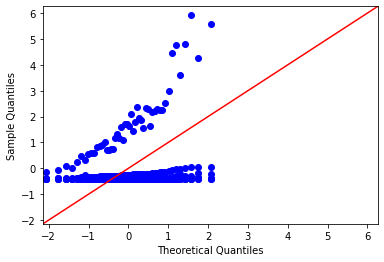

In [207]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
from scipy.stats import norm, uniform
x = np.array(data.loc[:,numerical_cols]).astype('float64')
qqplot(x,norm,fit=True,line="45")
plt.show()

### Box Cox

<p> A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.
<p> 


Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

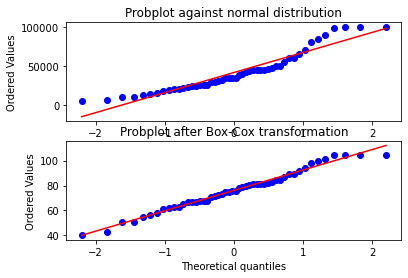

In [211]:
from scipy import stats
import matplotlib.pyplot as plt

x = np.array(data['Mthly_HH_Income'])
fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')